<a href="https://colab.research.google.com/github/Binho-do-Boa/Atividades_UFMT/blob/main/K_Means_Happing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [27]:
train_data = pd.read_csv('happiness_treino.csv')
test_data = pd.read_csv('happiness_teste.csv')
train_data.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025
1,Afghanistan,0.332,0.537,0.255,0.085,0.191,0.036
2,Albania,0.947,0.848,0.874,0.383,0.178,0.027
3,Albania,0.916,0.817,0.790,0.419,0.149,0.032
4,Angola,0.730,1.125,0.269,0.000,0.079,0.061


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             299 non-null    object 
 1   GDP per capita                299 non-null    float64
 2   Social support                299 non-null    float64
 3   Healthy life expectancy       299 non-null    float64
 4   Freedom to make life choices  299 non-null    float64
 5   Generosity                    299 non-null    float64
 6   Perceptions of corruption     299 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.5+ KB


In [29]:
train_data.describe()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.890572,1.208288,0.657405,0.424077,0.183796,0.111515
std,0.392721,0.303322,0.255052,0.154059,0.097638,0.095920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.598500,1.047500,0.481000,0.329500,0.108500,0.050000
50%,0.949000,1.266000,0.698000,0.449000,0.177000,0.082000
75%,1.208000,1.456000,0.856500,0.539500,0.245000,0.141500
max,1.684000,1.644000,1.141000,0.724000,0.598000,0.457000


In [30]:
# Separar as características e normalizar
features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

X_train = train_data[features]
X_test = test_data[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Aplicar o K-means com 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

In [32]:
# Prever os clusters para os dados de treinamento
train_clusters = kmeans.predict(X_train_scaled)
train_data['Cluster'] = train_clusters

In [33]:
# Prever os clusters para os dados de teste
test_clusters = kmeans.predict(X_test_scaled)
test_data['Cluster'] = test_clusters

In [34]:
# Avaliar o resultado usando a métrica de Silhouette
silhouette_avg = silhouette_score(X_train_scaled, train_clusters)

In [35]:
# Mostrar os dados de teste com os clusters atribuídos
test_clusters_result = test_data[['Country or region', 'Cluster']]

In [36]:
print(f'Silhouette Score: {silhouette_avg}')
print(test_clusters_result.head())

Silhouette Score: 0.23592781674214763
  Country or region  Cluster
0           Algeria        3
1           Bolivia        1
2            Brazil        1
3          Cambodia        6
4           Germany        5


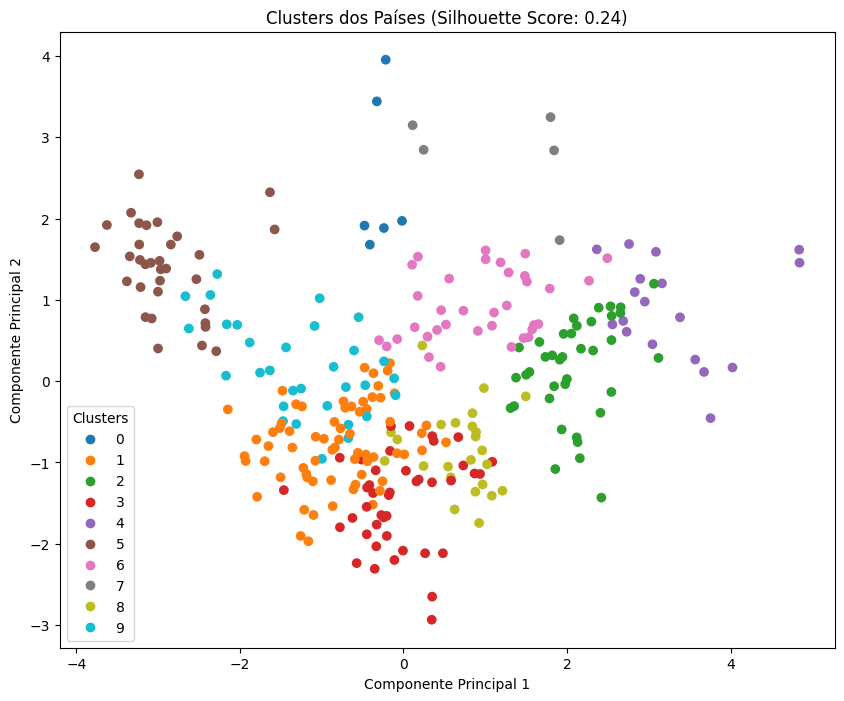

In [37]:
# Reduzir a dimensionalidade para 2D para visualização
pca = PCA(n_components=2)
train_pca = pca.fit_transform(X_train_scaled)

# Plotar os clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_pca[:, 0], train_pca[:, 1], c=train_clusters, cmap='tab10')

# Adicionar legenda
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title(f'Clusters dos Países (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [40]:
# Calcular a média de cada cluster e rankear por nível de felicidade
cluster_means = train_data.groupby('Cluster')[features].mean()
cluster_means['Happiness Score'] = cluster_means.mean(axis=1)
cluster_means = cluster_means.sort_values(by='Happiness Score', ascending=False)

print("Ranking dos clusters por nível de felicidade:")
print(cluster_means[['Happiness Score']])

Ranking dos clusters por nível de felicidade:
         Happiness Score
Cluster                 
5               0.838753
9               0.716242
1               0.656928
0               0.619528
3               0.606373
8               0.511792
6               0.479005
7               0.400067
2               0.377022
4               0.263704
